In [1]:
import pandas as pd
import sqlite3
from sklearn.preprocessing import LabelEncoder

In [2]:
conn = sqlite3.connect('ca2.db')

In [155]:

housing_price = pd.read_csv('tipsho20_linear.csv')
housing_price.to_sql('housing_price', conn, if_exists='replace', index=False)
#https://ec.europa.eu/eurostat/databrowser/view/tipsho20/default/table?lang=en

1645

In [156]:
cost = pd.read_csv('sts_copi_a_linear.csv')
cost.to_sql('cost', conn, if_exists='replace', index=False)
#https://ec.europa.eu/eurostat/databrowser/view/sts_copi_a/default/table?lang=en

3327

In [157]:
investment = pd.read_csv('tipsna50_linear.csv')
investment.to_sql('investment', conn, if_exists='replace', index=False)

#https://ec.europa.eu/eurostat/databrowser/view/tipsna50/default/table?lang=en

756

In [158]:
pro_capita__income = pd.read_csv('sdg_10_20_linear.csv')
pro_capita__income.to_sql('pro_capita__income', conn, if_exists='replace', index=False)
#https://ec.europa.eu/eurostat/databrowser/view/sdg_10_20/default/table?lang=en

1378

In [159]:

res_buiding_permits = pd.read_csv('sts_cobp_a$defaultview_linear.csv')
res_buiding_permits.to_sql('res_buiding_permits', conn, if_exists='replace', index=False)
#https://ec.europa.eu/eurostat/databrowser/view/sts_cobp_a/default/table?lang=en

5404

In [160]:

population = pd.read_csv('nama_10_pe_linear.csv')
population.to_sql('population', conn, if_exists='replace', index=False)
#https://ec.europa.eu/eurostat/databrowser/view/namq_10_pe/default/table?lang=en

15304

In [161]:

query = "SELECT geo,TIME_PERIOD,OBS_VALUE as'housing_price' FROM  housing_price WHERE unit ='INX_A_AVG' "


housing_price = pd.read_sql_query(query, conn)

In [162]:
query = "SELECT geo,TIME_PERIOD,OBS_VALUE as 'Output price index in construction' FROM cost WHERE unit = 'I15' AND indic_bt ='CSTO' GROUP BY geo,TIME_PERIOD,indic_bt"

cost = pd.read_sql_query(query, conn)

In [163]:
query = "SELECT geo,TIME_PERIOD,OBS_VALUE as 'investment in costruction' FROM investment"

investment = pd.read_sql_query(query, conn)

In [164]:
query = "SELECT geo,TIME_PERIOD,OBS_VALUE as 'pro_capita__income'  FROM  pro_capita__income WHERE unit = 'PPS_EU27_2020_HAB' "


pro_capita__income = pd.read_sql_query(query, conn)

In [165]:
query = "SELECT geo,TIME_PERIOD,OBS_VALUE as 'res_buiding_permits'  FROM  res_buiding_permits WHERE unit = 'MIO_M2' AND cpa2_1 = 'CPA_F41001'"


res_buiding_permits = pd.read_sql_query(query, conn)

In [166]:

query = "SELECT geo,TIME_PERIOD,OBS_VALUE as 'population'  FROM  population WHERE na_item ='POP_NC' AND unit = 'THS_PER'  GROUP BY geo,TIME_PERIOD "


population = pd.read_sql_query(query, conn)

In [167]:
population.head()

,geo,TIME_PERIOD,population
0,AL,1995,3177.91
1,AL,1996,3158.16
2,AL,1997,3138.41
3,AL,1998,3118.65
4,AL,1999,3098.90


In [168]:

final = pd.merge(housing_price, cost, on=['geo', 'TIME_PERIOD'])
final = pd.merge(final, investment, on=['geo', 'TIME_PERIOD'])
final = pd.merge(final, pro_capita__income, on=['geo', 'TIME_PERIOD'])
final = pd.merge(final, res_buiding_permits, on=['geo', 'TIME_PERIOD'])
final = pd.merge(final, population, on=['geo', 'TIME_PERIOD'])

In [169]:
final['geo'].unique()

array(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI',
       'FR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'NL', 'PL', 'PT',
       'SE', 'SI', 'SK'], dtype=object)

In [172]:
final.describe()

,TIME_PERIOD,housing_price,Output price index in construction,investment in costruction,pro_capita__income,res_buiding_permits,population
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,2016.954751,114.281222,105.509955,3.916290,19934.416290,7.199095,17210.523529
std,2.584523,20.727997,9.078576,1.622486,5473.353654,10.168628,22589.140392
min,2013.000000,76.990000,94.900000,0.600000,8981.000000,0.300000,545.330000
25%,2015.000000,100.000000,100.000000,2.600000,15592.000000,1.300000,4047.260000
50%,2017.000000,107.200000,102.600000,3.800000,19352.000000,3.400000,8877.640000
75%,2019.000000,123.980000,109.000000,5.200000,23832.000000,8.300000,11544.000000
max,2021.000000,208.040000,160.700000,8.100000,36319.000000,41.900000,83196.000000


In [173]:
final['housing_price'] = np.sqrt((final['housing_price']))

In [174]:
final['Output price index in construction'] = np.sqrt((final['Output price index in construction']))

In [175]:
final['res_buiding_permits'] = np.log((final['res_buiding_permits']))

In [176]:
final['population'] = np.log((final['population']))

In [177]:
final.describe()

,TIME_PERIOD,housing_price,Output price index in construction,investment in costruction,pro_capita__income,res_buiding_permits,population
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,2016.954751,10.650169,10.263082,3.916290,19934.416290,1.202446,8.968310
std,2.584523,0.926827,0.424166,1.622486,5473.353654,1.238771,1.303716
min,2013.000000,8.774395,9.741663,0.600000,8981.000000,-1.203973,6.301391
25%,2015.000000,10.000000,10.000000,2.600000,15592.000000,0.262364,8.305795
50%,2017.000000,10.353743,10.129166,3.800000,19352.000000,1.223775,9.091291
75%,2019.000000,11.134631,10.440307,5.200000,23832.000000,2.116256,9.353921
max,2021.000000,14.423592,12.676750,8.100000,36319.000000,3.735286,11.328955


In [178]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings 
warnings.filterwarnings('ignore')

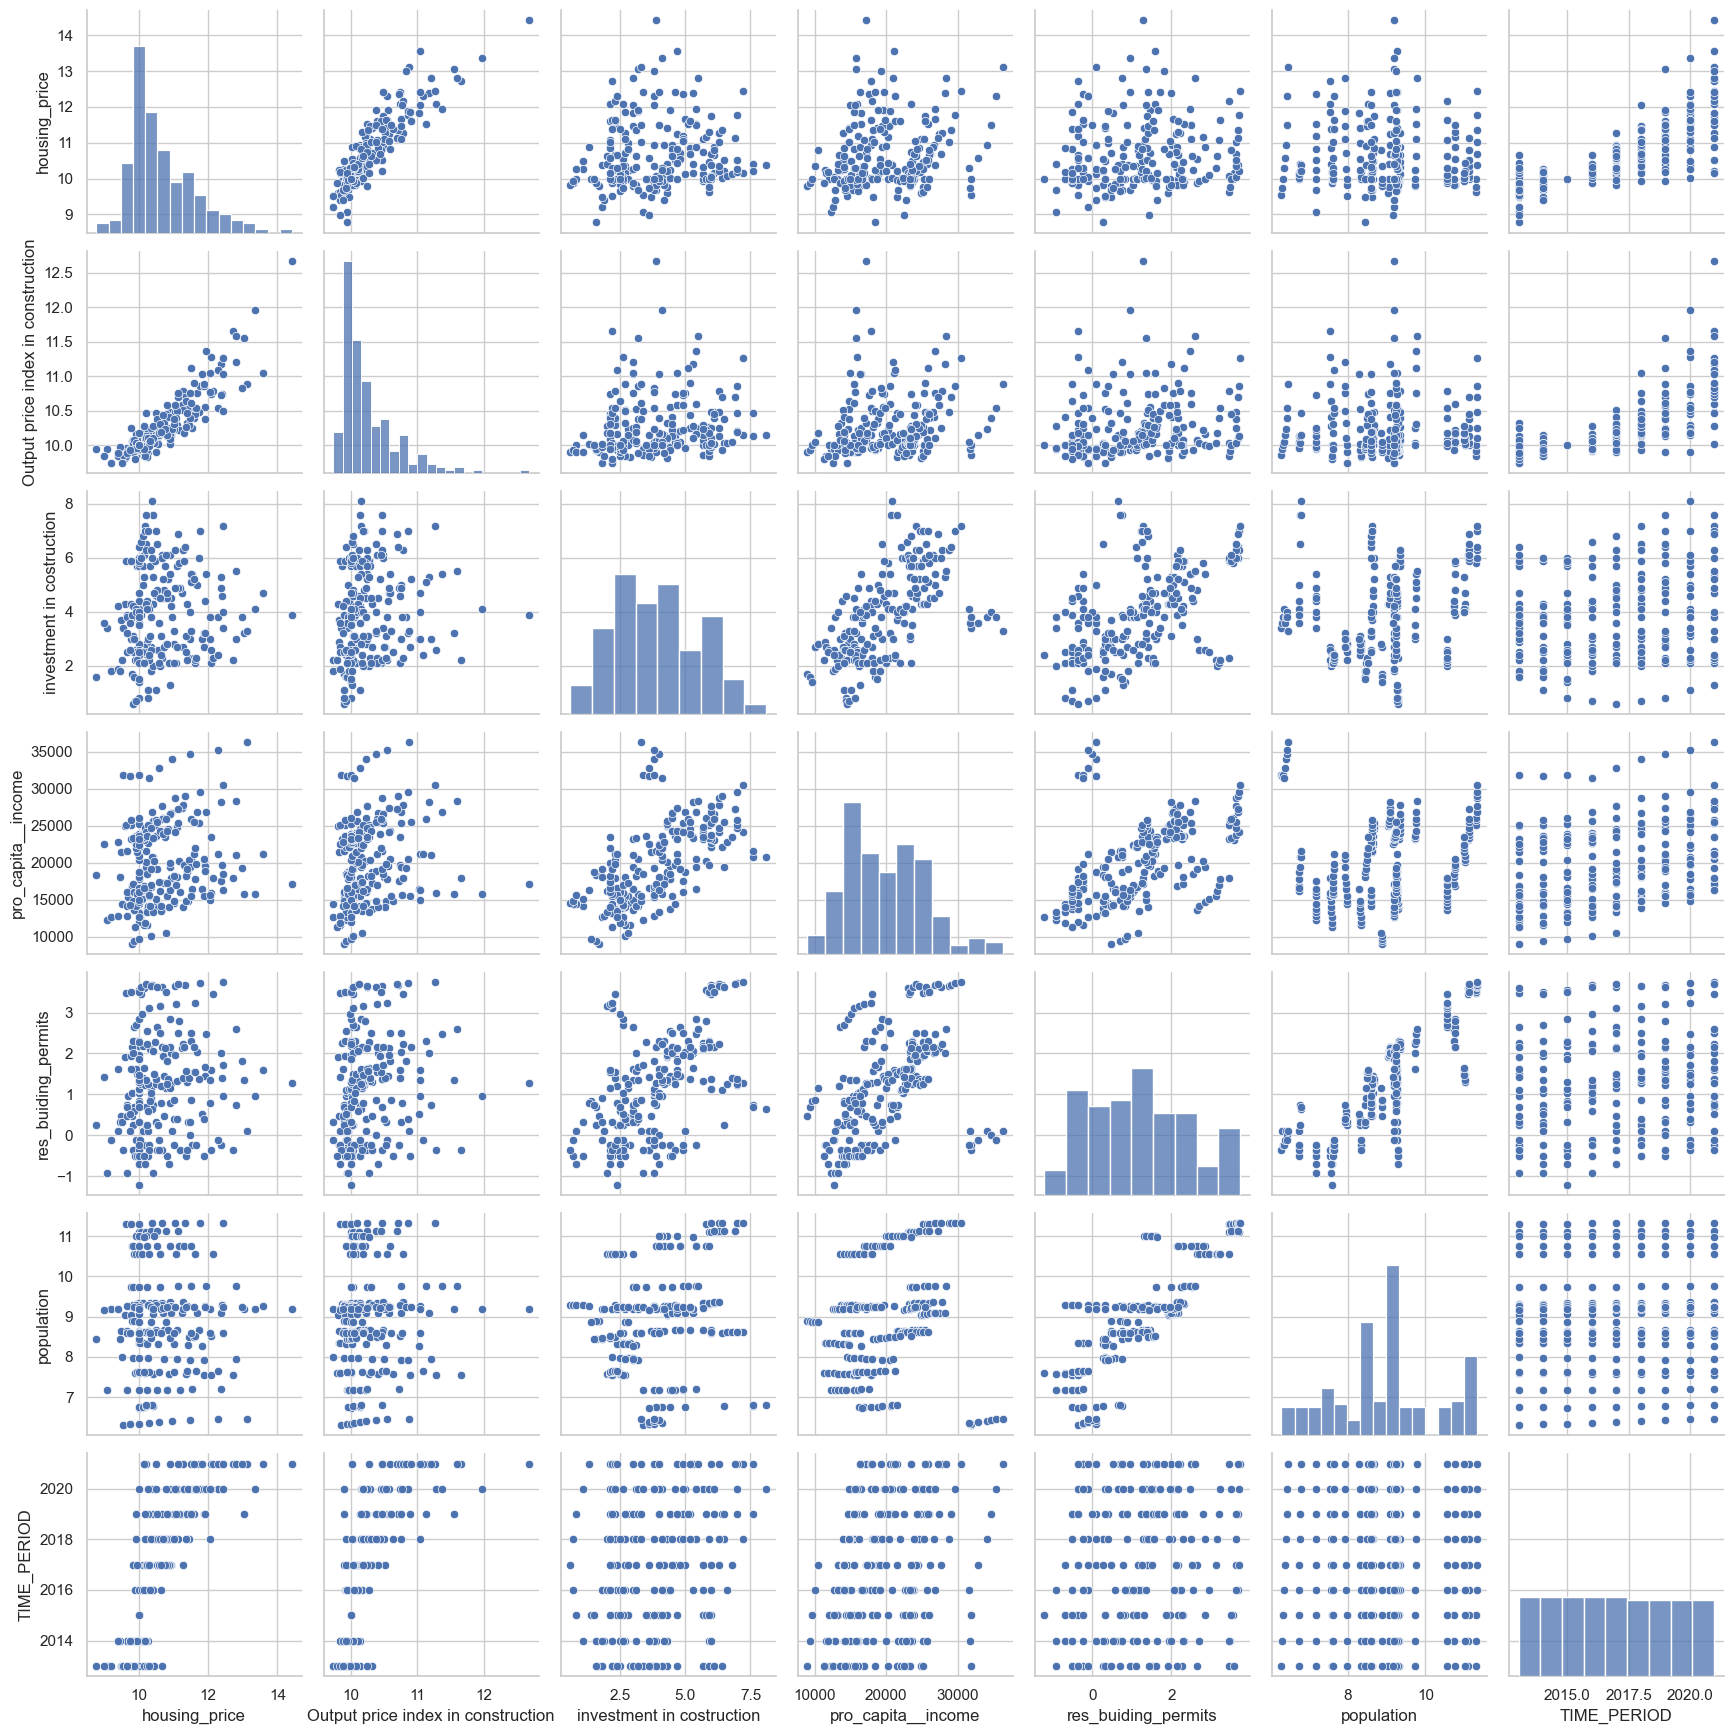

In [179]:
# Create plots to study the variables
sns.set(style='whitegrid', context='notebook')
# declare the columns for the plot
cols = ['housing_price', 'Output price index in construction', 'investment in costruction', 'pro_capita__income', 
        'res_buiding_permits','population','TIME_PERIOD']
# Display the pairplot 
sns.pairplot(final[cols], height = 2.5)
plt.tight_layout()
plt.show()

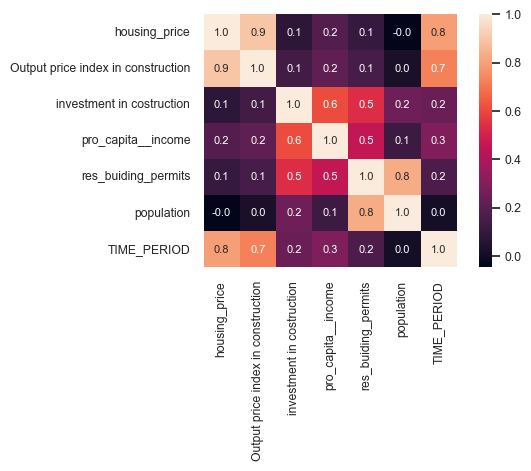

In [180]:
# Plot the correlation matrix
cm = np.corrcoef(final[cols].values.T)

# Set the font size of the plot
sns.set(font_scale = 0.8)

hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.1f',
            annot_kws={'size': 8},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
plt.show()

In [181]:
#create dataframe with only numerical variables
final3= final.drop(columns='geo')

In [182]:
# creating training and test datasets with 70/30 splitting
df_train, df_test = train_test_split(final3, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 42)


In [183]:
df_test.head()

,TIME_PERIOD,housing_price,Output price index in construction,investment in costruction,pro_capita__income,res_buiding_permits,population
132,2014,10.198039,10.104454,4.3,20026,1.360977,11.007431
148,2021,12.800000,11.211601,3.0,20999,0.741937,7.940363
93,2020,10.276186,10.193135,7.0,25083,1.252763,8.618070
180,2017,10.284940,10.029955,2.2,15541,3.117950,10.556385
15,2019,10.666771,10.397115,6.1,25934,2.163323,9.349145


In [184]:
# divide into X_train, y_train, X_test, y_test and remove column housing_price
y_train = df_train.pop('housing_price')
X_train = df_train

y_test = df_test.pop('housing_price')
X_test = df_test

In [185]:
# num of max features
len(X_train.columns)

6

In [186]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=3)             
rfe = rfe.fit(X_train, y_train)

In [187]:
#output of features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TIME_PERIOD', True, 1),
 ('Output price index in construction', True, 1),
 ('investment in costruction', True, 1),
 ('pro_capita__income', False, 4),
 ('res_buiding_permits', False, 2),
 ('population', False, 3)]

In [188]:
# predict prices of X_test
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.8232962527185205


In [189]:
# cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)



In [190]:
# range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 7))}]




In [191]:
# perform grid search

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             


model_wg = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



In [ ]:
# fit the model
model_wg.fit(X_train, y_train) 

In [193]:
# results
results = pd.DataFrame(model_wg.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010030,0.003240,0.002090,0.001097,1,{'n_features_to_select': 1},0.749923,0.810077,0.863392,0.747616,...,0.789401,0.043327,6,0.812924,0.803457,0.797820,0.814562,0.806352,0.807023,0.006157
1,0.005404,0.000291,0.001173,0.000103,2,{'n_features_to_select': 2},0.866722,0.817919,0.873593,0.859238,...,0.854702,0.019374,5,0.857843,0.871790,0.856788,0.855612,0.857139,0.859834,0.006021
2,0.004076,0.000174,0.001069,0.000062,3,{'n_features_to_select': 3},0.865207,0.812771,0.894716,0.850927,...,0.858000,0.026705,1,0.870539,0.875126,0.866711,0.870720,0.867911,0.870201,0.002900
3,0.003201,0.000041,0.001011,0.000011,4,{'n_features_to_select': 4},0.865405,0.802592,0.894917,0.851286,...,0.856204,0.030313,4,0.870625,0.876052,0.866773,0.870766,0.868008,0.870445,0.003194
4,0.002516,0.000014,0.000999,0.000007,5,{'n_features_to_select': 5},0.866724,0.812453,0.887329,0.856326,...,0.857778,0.024812,2,0.872514,0.888404,0.869390,0.871550,0.868017,0.873975,0.007386
5,0.001776,0.000120,0.000924,0.000039,6,{'n_features_to_select': 6},0.868370,0.813775,0.884783,0.856965,...,0.857465,0.023706,3,0.872851,0.888799,0.870234,0.871556,0.869574,0.874603,0.007187


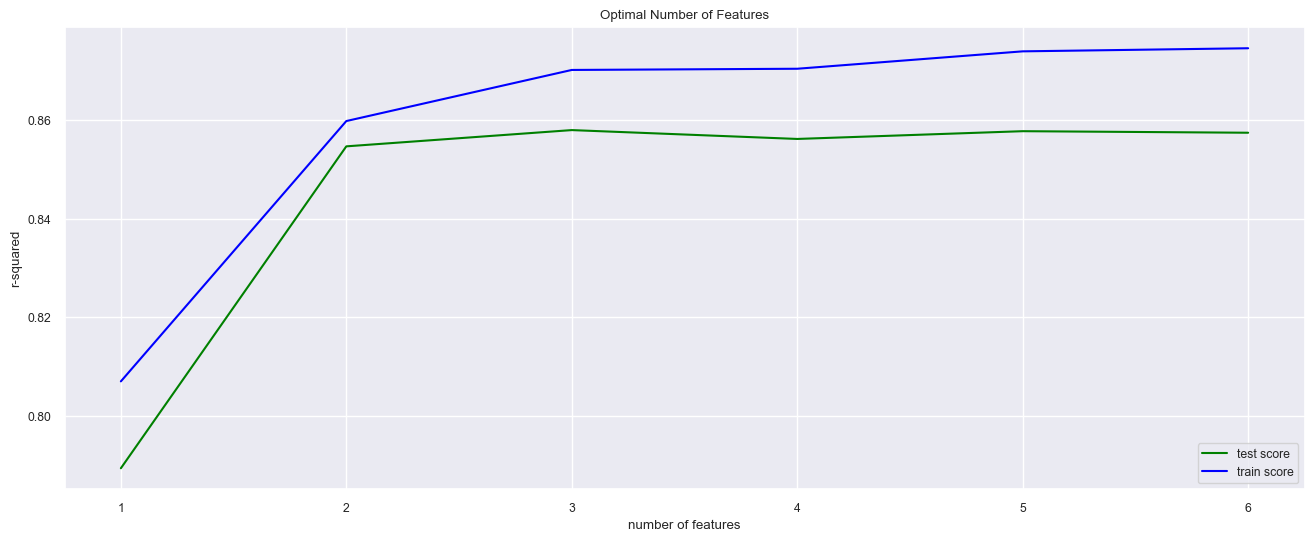

In [194]:
# plotting r2 values per each num feature 
plt.figure(figsize=(16,6))

plt.plot(results["param_n_features_to_select"], results["mean_test_score"],color='green')
plt.plot(results["param_n_features_to_select"], results["mean_train_score"],color='blue')
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='lower right')

In [195]:
n_features = 2

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

In [197]:
rfe = RFE(lm, n_features_to_select=n_features)             
rfe = rfe.fit(X_train, y_train)

In [198]:
# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.8384915121790949


In [199]:
#output of features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TIME_PERIOD', True, 1),
 ('Output price index in construction', True, 1),
 ('investment in costruction', False, 2),
 ('pro_capita__income', False, 5),
 ('res_buiding_permits', False, 3),
 ('population', False, 4)]